<h2 align="right">Case Study 6</h2> 
<h1 align="center">Case study on Pre-processing</h1><br/>
<h2>Objectives :</h2><br>
Do the following on titanic dataset(titanic_dataset.csv).
<ol>
<li>Load the dataset into python environment.
</li>
<li>Make ‘PassengerId’ as the index column.
</li>
<li>Check the basic details of the dataset.
</li>
<li>Fill in all the missing values present in all the columns in the dataset.
</li>
<li>Check and handle outliers in at least 3 columns in the dataset.
</li>
<li>Do min max scaling on the feature set (Take ‘Survived’ as target).
</li>
</ol>
<br/>
<br/>

# 1. Load the dataset into python environment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# load data file
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column.

In [2]:
df.set_index(['PassengerId'], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset.

In [3]:
df.shape

(891, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset.

### Visualizing the missing values

<AxesSubplot:ylabel='PassengerId'>

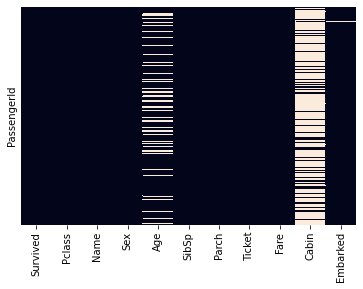

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

We are ignoring the “Cabin” column since 77%(687 of 891 records) of that column is missing.

In [10]:
df=df.drop('Cabin',axis=1)

In [11]:
#To fill the missing values in the Age column, we are going to use the median of that column.
df['Age'] = df['Age'].fillna((df['Age'].median()))
df['Age'] .isnull().sum()

0

In [12]:
#In the case of embarked, one of the best approaches (given that the number of null values is reduced) is to fill the null 
#values with the mode.
#complete embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Embarked'] .isnull().sum()

0

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset.

### Visualization
Outliers can be detected using different visualization methods, we are going to use :
<ul><li>Boxplot</li>
<li>Histogram</li></ul>

C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

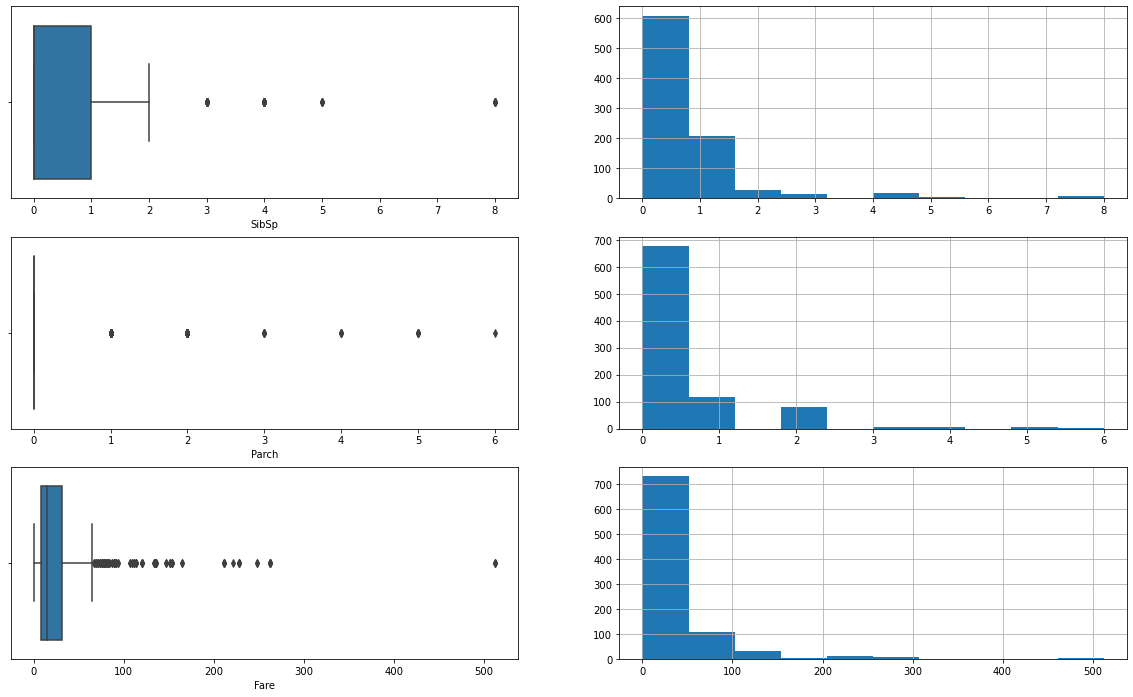

In [14]:
fig, ax = plt.subplots(3,2,figsize=(20, 12))
sns.boxplot(df['Fare'],data=df,ax=ax[2,0])
df['Fare'].hist(ax=ax[2,1])
sns.boxplot(df['Parch'],data=df,ax=ax[1,0])
df['Parch'].hist(ax=ax[1,1])
sns.boxplot(df['SibSp'],data=df,ax=ax[0,0])
df['SibSp'].hist(ax=ax[0,1])

### Skewness

In [15]:
print('skewness value of SibSp: ',df['SibSp'].skew())
print('skewness value of Parch: ',df['Parch'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of SibSp:  3.6953517271630565
skewness value of Parch:  2.7491170471010933
skewness value of Fare:  4.787316519674893


##### The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [16]:
#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘SibSp’
#variable.
Q01 = df['SibSp'].quantile(0.25)
Q03 = df['SibSp'].quantile(0.75)
IQR0 = Q03 - Q01
whisker_width0 = 1.5
lower_whisker0 = Q01 -(whisker_width0*IQR0)
upper_whisker0 = Q03 + (whisker_width0*IQR0)
df['SibSp']=np.where(df['SibSp']>upper_whisker0,upper_whisker0,np.where(df['SibSp']<lower_whisker0,lower_whisker0,df['SibSp']))


#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Parch’
#variable.
Q11 = df['Parch'].quantile(0.25)
Q13 = df['Parch'].quantile(0.75)
IQR1 = Q13 - Q11
whisker_width1 = 1.5
lower_whisker1 = Q11 -(whisker_width1*IQR1)
upper_whisker1 = Q13 + (whisker_width1*IQR1)
df['Parch']=np.where(df['Parch']>upper_whisker1,upper_whisker1,np.where(df['Parch']<lower_whisker1,lower_whisker1,df['Parch']))


#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’
#variable.
Q21 = df['Fare'].quantile(0.25)
Q23 = df['Fare'].quantile(0.75)
IQR2 = Q23 - Q21
whisker_width2 = 1.5
lower_whisker2 = Q21 -(whisker_width2*IQR2)
upper_whisker2 = Q23 + (whisker_width2*IQR2)
df['Fare']=np.where(df['Fare']>upper_whisker2,upper_whisker2,np.where(df['Fare']<lower_whisker2,lower_whisker2,df['Fare']))

C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

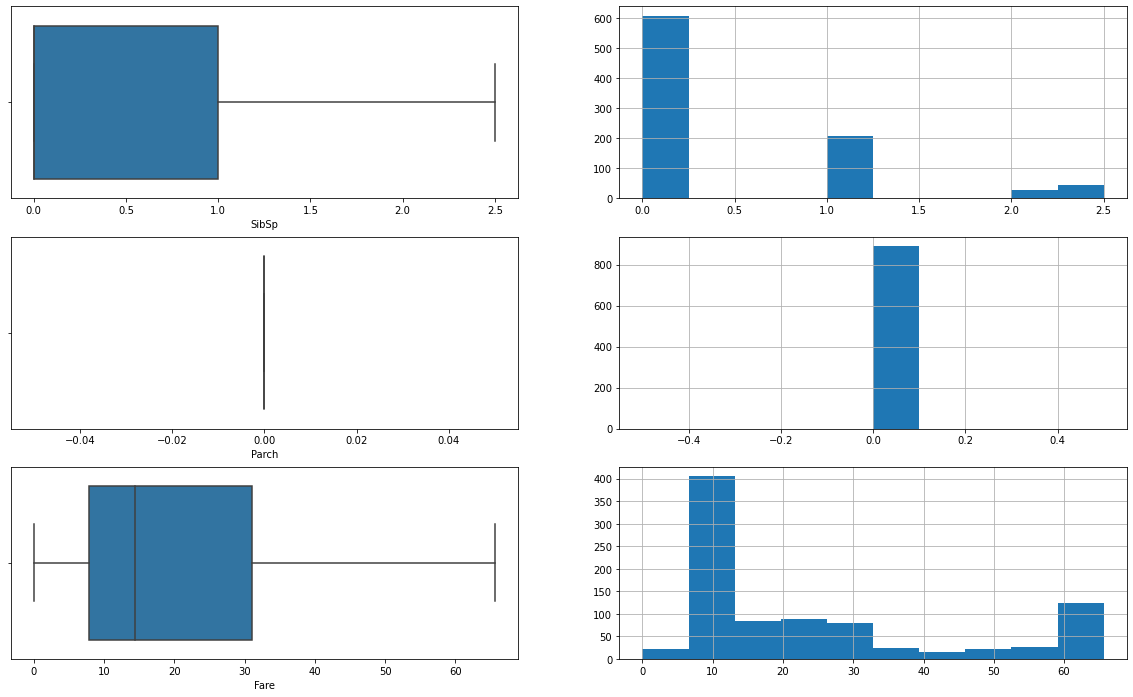

In [17]:
#check if there is still the presence of outliers.

fig, ax = plt.subplots(3,2,figsize=(20, 12))
sns.boxplot(df['Fare'],data=df,ax=ax[2,0])
df['Fare'].hist(ax=ax[2,1])
sns.boxplot(df['Parch'],data=df,ax=ax[1,0])
df['Parch'].hist(ax=ax[1,1])
sns.boxplot(df['SibSp'],data=df,ax=ax[0,0])
df['SibSp'].hist(ax=ax[0,1])

#### The plots above shows no presence of outliers.<br/><br/><br/>

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target).

C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

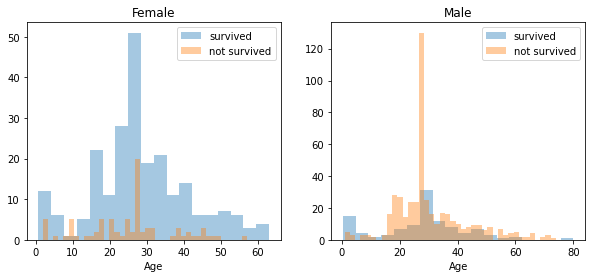

In [18]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

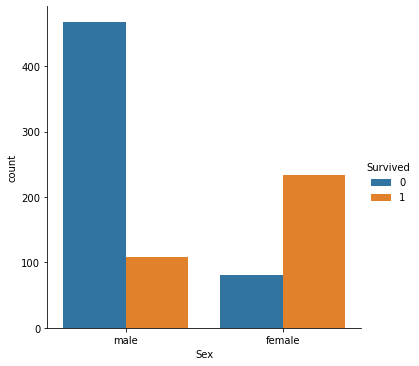

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

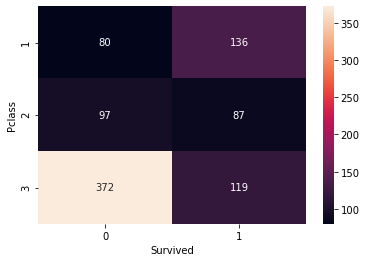

In [20]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [21]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()
df['Title'] = df['Name'].apply(get_title)
df.drop('Name', axis=1, inplace= True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [22]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})
df['Title']=df['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':4, 'Rev':5, 'Dr':6, 'Mme':7, 'Ms':8,
       'Major':9, 'Lady':10, 'Sir':11, 'Mlle':12, 'Col':13, 'Capt':14, 'the Countess':15,
       'Jonkheer':16})


In [23]:
#ignoring unwanted columns
df=df.drop('Ticket',axis=1)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22.0,1.0,0.0,7.2500,2,0
2,1,1,1,38.0,1.0,0.0,65.6344,0,1
3,1,3,1,26.0,0.0,0.0,7.9250,2,2
4,1,1,1,35.0,1.0,0.0,53.1000,2,1
5,0,3,0,35.0,0.0,0.0,8.0500,2,0


In [25]:
y=df['Survived']
X=df.drop('Survived', axis=1)

In [26]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)

In [27]:
X= pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,0.654321,0.352413,0.363679,0.170595,0.0,0.366375,0.768238,0.058502
std,0.418036,0.477990,0.163605,0.283298,0.0,0.312056,0.395752,0.107834
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000,0.0,0.120522,0.500000,0.000000
50%,1.000000,0.000000,0.346569,0.000000,0.0,0.220223,1.000000,0.000000
75%,1.000000,1.000000,0.434531,0.400000,0.0,0.472313,1.000000,0.125000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print('R squared value is: ', r2_score(y_test,predictions))

MSE is:  0.1344593328974117
R squared value is:  0.4455326273660273
